# IMPORTING LIBRARIES OF PYTHON

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics  import confusion_matrix , ConfusionMatrixDisplay
from sklearn.metrics import precision_score  , recall_score , accuracy_score, f1_score
from sklearn.model_selection import train_test_split , GridSearchCV ,  PredefinedSplit
from sklearn.preprocessing import StandardScaler

# LOADING DATASET

In [105]:
df1 = pd.read_csv("fraudTrain.csv")
df2 = pd.read_csv("fraudTest.csv")

In [106]:
#concating two dataset
df0 = pd.concat([df1, df2], ignore_index=True)

In [107]:
df0.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [108]:
df0.shape

(1852394, 23)

# EDA AND DATA CLEANING

In [109]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud          

In [110]:
df0.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [111]:
#checking null values
df0.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [112]:
#checking duplicate values
df0.duplicated().sum()

0

In [113]:
df0 = df0.drop(["Unnamed: 0" , "cc_num" , "merchant" , "first" , "last" , "street" , "lat" , "long" , "job" , "trans_num" , "unix_time" , "merch_lat" , "merch_long" , "city" , "state" , "zip"] , axis = 1)

In [114]:
df0.head()

,trans_date_trans_time,category,amt,gender,city_pop,dob,is_fraud
0,2019-01-01 00:00:18,misc_net,4.97,F,3495,1988-03-09,0
1,2019-01-01 00:00:44,grocery_pos,107.23,F,149,1978-06-21,0
2,2019-01-01 00:00:51,entertainment,220.11,M,4154,1962-01-19,0
3,2019-01-01 00:01:16,gas_transport,45.00,M,1939,1967-01-12,0
4,2019-01-01 00:03:06,misc_pos,41.96,M,99,1986-03-28,0


In [115]:
#converting trans_date_trans_time and dob to date type from object data type
df0['trans_date_trans_time'] = pd.to_datetime(df0['trans_date_trans_time'])
df0['dob'] = pd.to_datetime(df0['dob'])

In [116]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 7 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   category               object        
 2   amt                    float64       
 3   gender                 object        
 4   city_pop               int64         
 5   dob                    datetime64[ns]
 6   is_fraud               int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(2)
memory usage: 98.9+ MB


In [117]:
df0['hr_day'] = df0['trans_date_trans_time'].dt.hour

In [118]:
# creating a function which will be applied on the time_of_day variable to transform it to categorical

def time_of_day(hour):
    if  0 <= hour['hr_day'] <= 7:
        val = "night"
    elif 8 <= hour['hr_day'] <= 15:
        val = "morning"
    else:
        val = "midday"
    return val

In [119]:
df0['time_of_day'] = df0.apply(time_of_day , axis = 1)

In [120]:
df0.head()

,trans_date_trans_time,category,amt,gender,city_pop,dob,is_fraud,hr_day,time_of_day
0,2019-01-01 00:00:18,misc_net,4.97,F,3495,1988-03-09,0,0,night
1,2019-01-01 00:00:44,grocery_pos,107.23,F,149,1978-06-21,0,0,night
2,2019-01-01 00:00:51,entertainment,220.11,M,4154,1962-01-19,0,0,night
3,2019-01-01 00:01:16,gas_transport,45.00,M,1939,1967-01-12,0,0,night
4,2019-01-01 00:03:06,misc_pos,41.96,M,99,1986-03-28,0,0,night


In [121]:
# extract year from dob variable
df0['year_birth']= df0['dob'].dt.year

In [122]:
# create the function
def age(age):
    if  2024 - age['year_birth'] <= 29 :
        val = "Young"
    elif 30 <= 2024 - age['year_birth'] <=59 :
        val = "Middle-Aged"
    else:
        val = "Old"
    return val

In [123]:
df0['age'] = df0.apply(age , axis = 1)

In [124]:
df0.head()

,trans_date_trans_time,category,amt,gender,city_pop,dob,is_fraud,hr_day,time_of_day,year_birth,age
0,2019-01-01 00:00:18,misc_net,4.97,F,3495,1988-03-09,0,0,night,1988,Middle-Aged
1,2019-01-01 00:00:44,grocery_pos,107.23,F,149,1978-06-21,0,0,night,1978,Middle-Aged
2,2019-01-01 00:00:51,entertainment,220.11,M,4154,1962-01-19,0,0,night,1962,Old
3,2019-01-01 00:01:16,gas_transport,45.00,M,1939,1967-01-12,0,0,night,1967,Middle-Aged
4,2019-01-01 00:03:06,misc_pos,41.96,M,99,1986-03-28,0,0,night,1986,Middle-Aged


In [125]:
df0 = df0.drop(['trans_date_trans_time' , 'dob' , 'hr_day' , 'year_birth'] ,axis = 1)

In [126]:
df0.head()

,category,amt,gender,city_pop,is_fraud,time_of_day,age
0,misc_net,4.97,F,3495,0,night,Middle-Aged
1,grocery_pos,107.23,F,149,0,night,Middle-Aged
2,entertainment,220.11,M,4154,0,night,Old
3,gas_transport,45.00,M,1939,0,night,Middle-Aged
4,misc_pos,41.96,M,99,0,night,Middle-Aged


# DATA VISUALIZATIONS

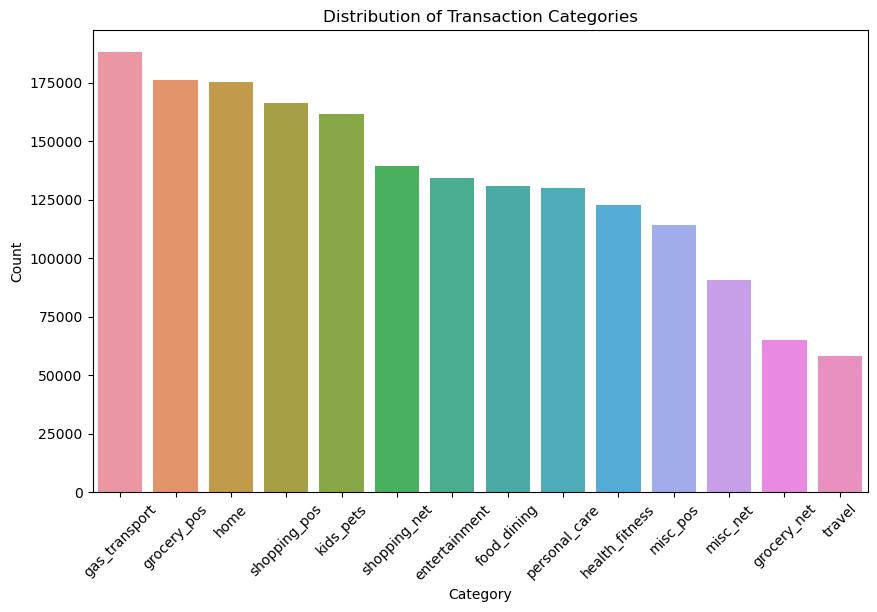

In [127]:
# Bar plot of 'category' (Transaction Category)
plt.figure(figsize=(10, 6))
sns.countplot(data=df0, x='category', order=df0['category'].value_counts().index)
plt.title('Distribution of Transaction Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

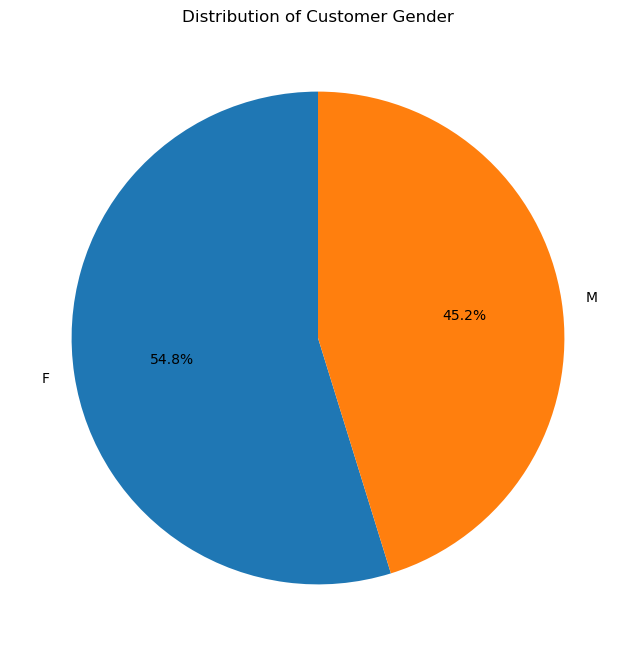

In [128]:
plt.figure(figsize=(8, 8))
df0['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Customer Gender')
plt.ylabel('')
plt.show()

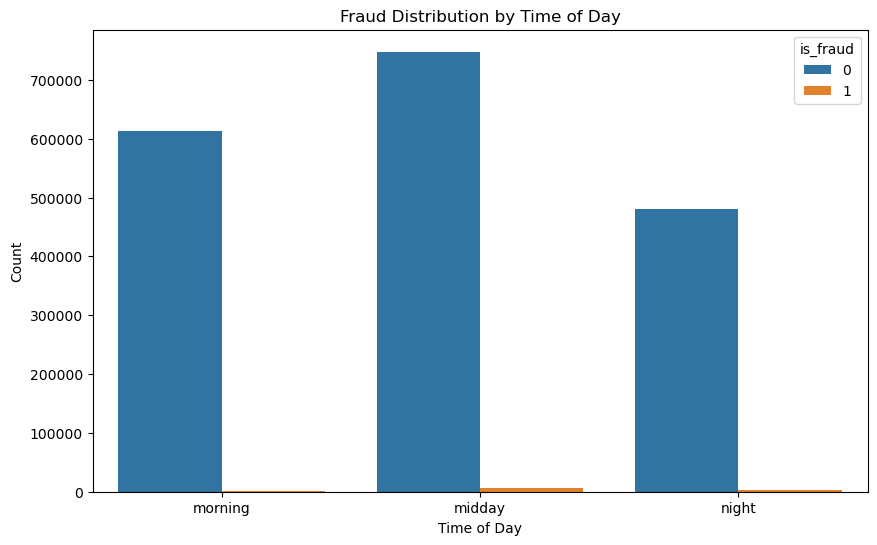

In [129]:
# bar plot of 'time_of_day' and 'is_fraud'
plt.figure(figsize=(10, 6))
sns.countplot(data=df0, x='time_of_day', hue='is_fraud', order=['morning', 'midday', 'night'])
plt.title('Fraud Distribution by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.legend(title='is_fraud')
plt.show()

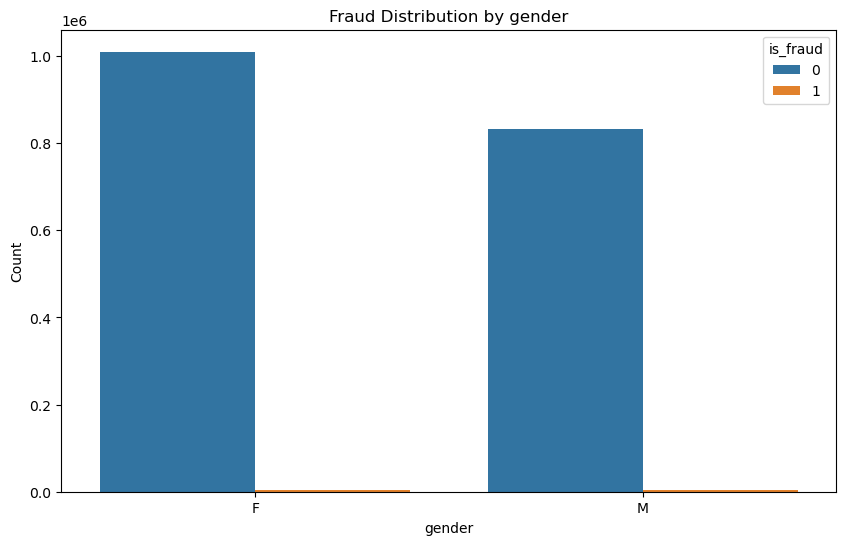

In [130]:
# bar plot of 'gender' and 'is_fraud'
plt.figure(figsize=(10, 6))
sns.countplot(data=df0, x='gender', hue='is_fraud')
plt.title('Fraud Distribution by gender')
plt.xlabel('gender')
plt.ylabel('Count')
plt.legend(title='is_fraud')
plt.show()

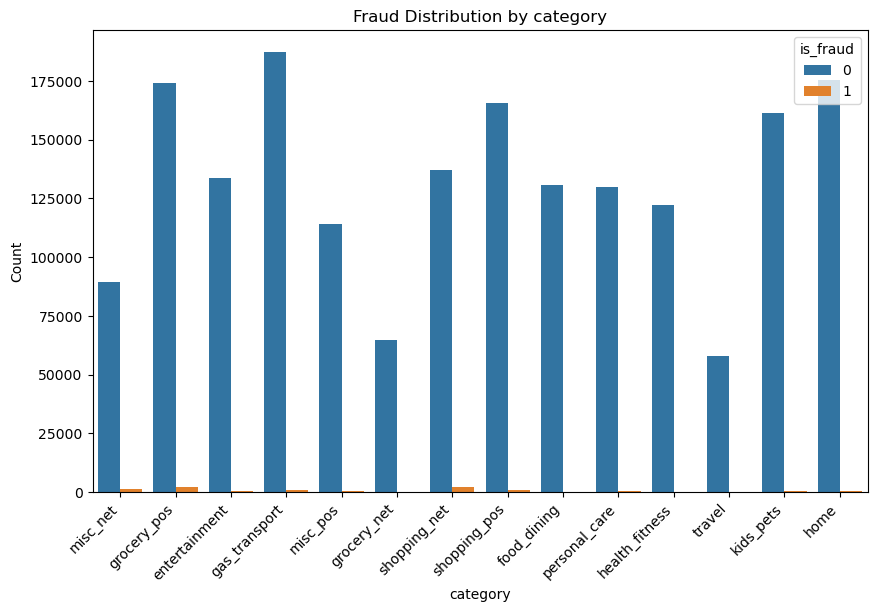

In [82]:
# bar plot of 'category' and 'is_fraud'
plt.figure(figsize=(10, 6))
sns.countplot(data=df0, x='category', hue='is_fraud')
plt.title('Fraud Distribution by category')
plt.xlabel('category')
plt.ylabel('Count')
plt.legend(title='is_fraud')
plt.xticks(rotation=45, ha='right')
plt.show()

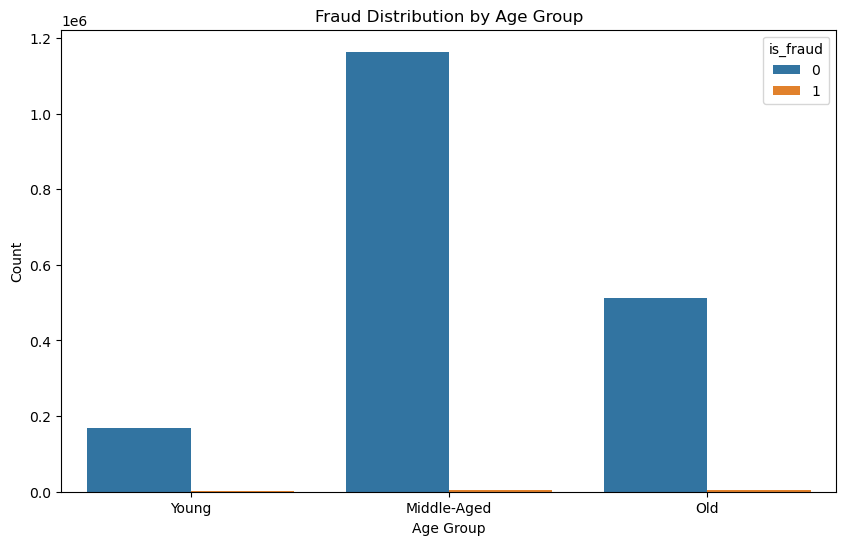

In [131]:
#bar plot of 'age' and 'is_fraud'
plt.figure(figsize=(10, 6))
sns.countplot(data=df0, x='age', hue='is_fraud', order=['Young', 'Middle-Aged', 'Old'])
plt.title('Fraud Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='is_fraud')
plt.show()

In [132]:
#convert categorical variable to numeric using get_dummies
df0=pd.get_dummies(df0)

In [133]:
df0.head()

,amt,city_pop,is_fraud,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,...,category_shopping_pos,category_travel,gender_F,gender_M,time_of_day_midday,time_of_day_morning,time_of_day_night,age_Middle-Aged,age_Old,age_Young
0,4.97,3495,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
1,107.23,149,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0
2,220.11,4154,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
3,45.00,1939,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
4,41.96,99,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0


In [134]:
# Get number fraud transactions
df0['is_fraud'].value_counts()

0    1842743
1       9651
Name: is_fraud, dtype: int64

<Axes: >

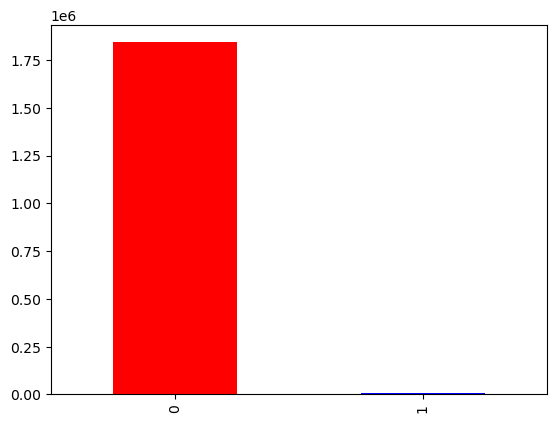

In [135]:
df0['is_fraud'].value_counts().plot.bar(color=['red', 'blue'])

In [136]:
from sklearn.utils import resample

# Separate majority and minority classes
majority_class = df0[df0['is_fraud'] == 0]
minority_class = df0[df0['is_fraud'] == 1]

# Downsample majority class
majority_downsampled = resample(majority_class, 
                                 replace=False,    # sample without replacement
                                 n_samples=len(minority_class),  # match minority class
                                 random_state=42)  # reproducible results

# Combine minority class with downsampled majority class
df0 = pd.concat([majority_downsampled, minority_class])

In [137]:
df0['is_fraud'].value_counts()

0    9651
1    9651
Name: is_fraud, dtype: int64

In [138]:
df0.shape

(19302, 25)

In [139]:
# Identifying features and target variable
X = df0.drop(['is_fraud'] , axis = 1)
y = df0['is_fraud']

In [140]:
# Split dataset into training , validating holdout(test) datasets

#creating Training and testing sets
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 0.3 , stratify=y , random_state = 42)
#creating a validation set
X_tr , X_val , y_tr , y_val = train_test_split(X_train, y_train , test_size = 0.5,  stratify=y_train , random_state = 10)

# MODEL BUILDING USING RANDOM FOREST CLASSIFIER

In [141]:
rf = RandomForestClassifier()

In [142]:
# Determine set of hyperparameters for random forest
rf_cv_params = {'n_estimators' : [50,100 , 150 , 200], 
              'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50],
             'min_samples_leaf': [2, 5, 10, 20, 50],
             'min_samples_split': [2, 4, 6],
              'max_features' : ["sqrt"], 
              'max_samples' : [.5,.9]}

scores = {'accuracy': 'accuracy' , 'precision':'precision', 'recall' : 'recall', 'f1':'f1'}

In [143]:
# Create list of split indices.
split_index = [0 if x in X_val.index else -1 for x in X_train.index]
custom_split = PredefinedSplit(split_index)

In [144]:
%%time 
rf_val = GridSearchCV(rf, rf_cv_params, cv= custom_split, scoring = scores ,  refit='f1', n_jobs = -1, verbose = 1)

# Fit the model
rf_val.fit(X_train , y_train)

Fitting 1 folds for each of 1680 candidates, totalling 1680 fits
CPU times: total: 8.39 s
Wall time: 3min 55s


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50],
                         'max_features': ['sqrt'], 'max_samples': [0.5, 0.9],
                         'min_samples_leaf': [2, 5, 10, 20, 50],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [50, 100, 150, 200]},
             refit='f1',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'},
             verbose=1)

In [145]:
rf_val.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'max_samples': 0.9,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [146]:
#creating a confusion matrix to identify how accurate our classifier is
def conf_matrix_plot(model, x_data, y_data):
    model_pred = model.predict(x_data) # Save predictions
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_) # Calculate the values for each quadrant in the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot(values_format='')  # `values_format=''` this is written to prevent the numbers in the confusion matrix to appear in that form (1.5e+03) 
    plt.show()    
    
    #Accuracy reports
    report =    {"Accuracy" :accuracy_score(y_data, model_pred) , 
                "Precision": precision_score(y_data, model_pred),
                "Recall" : recall_score(y_data, model_pred) , 
                "F1 Score" : f1_score(y_data, model_pred)}
    for key , value  in report.items():
        print(f"{key}:{round(value , 3)}")

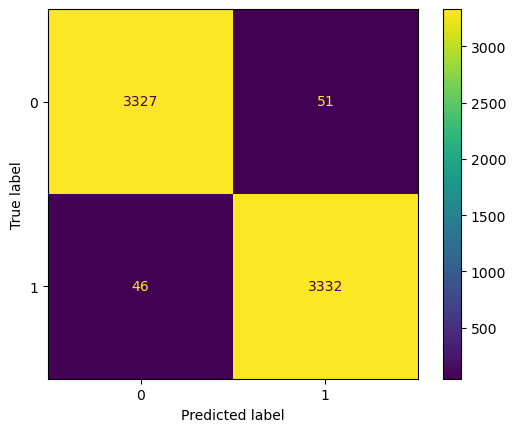

Accuracy:0.986
Precision:0.985
Recall:0.986
F1 Score:0.986


In [147]:
conf_matrix_plot(rf_val.best_estimator_, X_val, y_val)